In [1]:
# Load Dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [2]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
x = dataset.data
y = dataset.target

In [25]:
# Whiten the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

print("Mean:\n", scaler.mean_)
print("Var:\n", scaler.var_)
print("Samples seen: ", scaler.n_samples_seen_)

Mean:
 [1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]
Var:
 [1.23970943e+01 1.84663974e+01 5.89402799e+02 1.23625903e+05
 1.97452073e-04 2.78428549e-03 6.34407875e-03 1.50301462e-03
 7.50222008e-04 4.97611152e-05 7.67671984e-02 3.03781123e-01
 4.08071149e+00 2.06579462e+03 8.99927022e-06 3.20139261e-04
 9.09596835e-04 3.80055080e-05 6.82128053e-05 6.98938631e-06
 2.33191693e+01 3.77100918e+01 1.12714643e+03 3.23597671e+05
 5.20403629e-04 2.47112650e-02 4.34475982e-02 4.31314711e-03
 3.82085668e-03 3.25636075e-04]
Samples seen:  569


In [6]:
print("Example from Dataset after Whitening:")
print(dataset.data[0])
print(dataset.target[0])

Example from Dataset after Whitening:
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
0


In [7]:
# Import PCA from Sklearn
from sklearn.decomposition import PCA

n_components = 3
pca = PCA(n_components=n_components, copy=True)
pca.fit(x)

transformed_x = pca.transform(x)

In [8]:
# PCA Variables and Data

print("Components:\n", pca.components_)
print("Explained Variance: ", pca.explained_variance_)
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)
print("Sum of Explained Variance Ratio: ", sum(pca.explained_variance_ratio_))

Components:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970608 -0.21518136 -0.23107671  0.18611306  0.1518916
   0.06016535 -0.03476751  0.19034876  0.36657545 -0.10555215  0.08997967
  -0.08945724 -0.15229262  0.20443043  0.23271592  0.19720729  0.13032156
   0.18384801  0.28009205 -0.21986638 -0.04546729 -0.19987843 -0.21935186
   0.17230437  0.14359317  0.0979641  -0.00825724  0.14188335  0.27533946]
 [-0.00853117  0.06454998 -0.00931417  0.02869949 -0.10429116 -0.0740917
   0.00273347 -0.02556379 -0.04024016 -0.0225746   0.26848147  0.37463351
   0.26664532  0.2160066   0.30883845  0.1547802   0.17646384  0.22465761
   0.28858443  0.21150426 

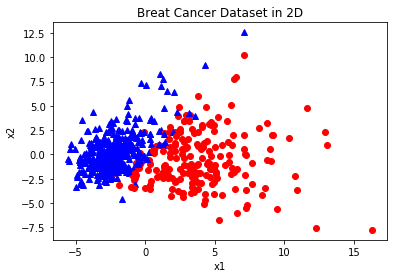

In [9]:
# Plot the new 2D Data

for index, point in enumerate(transformed_x):
    if y[index] == 0:
        plt.plot(point[0], point[1], color="red", marker="o")
    else:
        plt.plot(point[0], point[1], color="blue", marker="^")
   
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Breat Cancer Dataset in 2D")
plt.show()

#### Programmieraufgabe

In [28]:
# Aufgabe 1:
# Find die Anzahl an Dimensionen, um 90% der Varianz "zu erklären"

for i in range(1, 29):
    n_components = i
    pca = PCA(n_components=n_components, copy=True)
    pca.fit(x)
    
    explained_variance_ratio = sum(pca.explained_variance_ratio_)
    
    if explained_variance_ratio > 0.92:
        break
    else:  
        best_explained_variance_ratio = explained_variance_ratio
        print("Sum of Explained Variance Ratio: ", round(explained_variance_ratio, 6), "\t with: ", n_components, " components.")

Sum of Explained Variance Ratio:  0.44272 	 with:  1  components.
Sum of Explained Variance Ratio:  0.632432 	 with:  2  components.
Sum of Explained Variance Ratio:  0.726364 	 with:  3  components.
Sum of Explained Variance Ratio:  0.792385 	 with:  4  components.
Sum of Explained Variance Ratio:  0.847343 	 with:  5  components.
Sum of Explained Variance Ratio:  0.887588 	 with:  6  components.
Sum of Explained Variance Ratio:  0.910095 	 with:  7  components.


In [29]:
# Aufgabe 2:
# Wende das gefundene Setup auf die Daten an

n_components = 7
pca = PCA(n_components=n_components, copy=True)
pca.fit(x)
transformed_x = pca.transform(x)

In [30]:
# Aufgabe 3:
# Split das Dataset in ein Train and Testset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, random_state=42, test_size=0.30)

In [34]:
# Aufgabe 4:
# Wende das KNN-Verfahren an
from sklearn.neighbors import KNeighborsClassifier

best_score = 0.0

for i in range(1, 10):
    n_neighbors = i
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    neigh.fit(x_train, y_train)
    score = neigh.score(x_test, y_test)
    
    if score > best_score:
        best_score = score
        print("Score: ", score, " with: ", n_neighbors, " neighbors.")

Score:  0.9532163742690059  with:  1  neighbors.
Score:  0.9590643274853801  with:  3  neighbors.
Score:  0.9649122807017544  with:  6  neighbors.
Score:  0.9707602339181286  with:  8  neighbors.


In [35]:
# Aufgabe 5:
# Wende das KNN ohne Whitening und ohne PCA an
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.30)

best_score = 0.0

for i in range(1, 11):
    n_neighbors = i
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    neigh.fit(x_train, y_train)
    score = neigh.score(x_test, y_test)
    
    if score > best_score:
        best_score = score
        print("Score: ", score, " with: ", n_neighbors, " neighbors.")

Score:  0.935672514619883  with:  1  neighbors.
Score:  0.9415204678362573  with:  3  neighbors.
Score:  0.9473684210526315  with:  4  neighbors.
Score:  0.9590643274853801  with:  5  neighbors.
Score:  0.9649122807017544  with:  7  neighbors.
Score:  0.9707602339181286  with:  9  neighbors.
Score:  0.9824561403508771  with:  10  neighbors.


In [36]:
# Aufgabe 6:
# Suche dir ein weiteres Matrix Decomposition aus der sklearn.decomposition
# Klasse aus und wende es auf das Dataset an
from sklearn.decomposition import TruncatedSVD

dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

best_score = 0.0

for i in range(1, 30):    
    # Dimensionalty Reduction
    n_components = i
    svd = TruncatedSVD(n_components=n_components)
    svd.fit(x)
    transformed_x = svd.transform(x)
    
    # Train Test Split
    x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, random_state=42, test_size=0.30)
    
    for j in range(1, 15):
        # KNN
        n_neighbors = j
        neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
        neigh.fit(x_train, y_train)
        score = neigh.score(x_test, y_test)

        if score > best_score:
            best_score = score
            print("Score: ", score, "\twith:\t", n_neighbors, "\tneighbors and:\t", n_components, " components.")

Score:  0.9005847953216374 	with:	 1 	neighbors and:	 1  components.
Score:  0.9239766081871345 	with:	 3 	neighbors and:	 1  components.
Score:  0.935672514619883 	with:	 5 	neighbors and:	 1  components.
Score:  0.9473684210526315 	with:	 7 	neighbors and:	 1  components.
Score:  0.9649122807017544 	with:	 5 	neighbors and:	 2  components.
Score:  0.9707602339181286 	with:	 7 	neighbors and:	 2  components.
Score:  0.9824561403508771 	with:	 10 	neighbors and:	 2  components.
